## 목적
- 마케팅 전략 수립을 위한 고객 군집화
- 군집별 고객의 특성 파악

In [1]:
# 기본 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 데이터 준비
- 출처
    - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
    - 원본 데이터셋의 컬럼명을 한글화 하였음
- 단위
    - 연간소득 : 천달러
    - 소비점수 : 1~100점

In [2]:
df = pd.read_csv("C:/Users/EL087/Desktop/MS_MachineLearning/data/쇼핑몰고객군집화.csv")
df.head()

,고객ID,성별,나이,연간소득,소비점수
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 데이터 전처리

#### 사용할 컬럼 선택

In [3]:
X = df.drop(['고객ID'], axis=1) # 고객 열 제거
X.head()

,성별,나이,연간소득,소비점수
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
# ---------------------------------
# 데이터 유형 구분 - 범주형/수치형
# ---------------------------------
cat_cols = X.select_dtypes(include='object').columns # 범주형 컬럼
num_cols = X.select_dtypes(include='number').columns # 수치형 컬럼

#### 범주형 데이터 인코딩

- `drop='first'`
    - 범주형의 고윳값이 2개인 경우 하나의 컬럼만 사용

In [5]:
# -----------------
# 인코더 생성
# -----------------
from sklearn.preprocessing import OneHotEncoder     # 범주형 데이터를 수치형 벡터인 0, 1로 변환
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# -----------------
# 인코딩
# -----------------
X_encoded = encoder.fit_transform(X[cat_cols])

# -----------------
# 인코딩 결과를 데이터프레임 형태로 만들기
# -----------------
X_encoded = pd.DataFrame(X_encoded, columns=['성별'])
X_encoded.head()

,성별
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


인코더 생성
- OneHotEncoder: 범주형 데이터를 수치형 벡터인 0, 1로 변환
- sparse_output=False: 인코딩 결과를 우리가 보기 쉬운 일반 배열(dense array) 형태로 출력하도록 설정
- handle_unknown='ignore': 학습(fit) 과정에서 보지 못했던 **새로운 범주값**이 인코딩 단계에서 나타나도  
 에러를 발생시키지 않고 무시 (모두 0으로 처리)하도록 설정
- drop='first': 다중공선성 문제를 방지하기 위해 각 범주형 컬럼에서 첫 번째 범주에 해당하는 새로운 컬럼을 제거하도록 설정

인코딩
- fit 단계: 인코더가 선택된 범주형 데이터('성별' 컬럼의 'Male', 'Female' 등)를 분석하여 어떤 범주들이 있는지 파악(학습)
- transform 단계: 파악된 범주들을 설정(drop='first')에 맞추어 원-핫 인코딩을 수행하여 수치형 데이터 배열로 변환

In [6]:
# 전처리가 잘 되었는지 확인 (성별이 모두 0, 1)

# 1. 인코딩된 단일 컬럼을 선택
encoded_column = X_encoded.iloc[:, 0] # 첫 번째 (이자 유일한) 컬럼 선택

# 2. value_counts()를 사용하여 0과 1의 개수 확인
counts = encoded_column.value_counts()

# 3. 결과 출력
print("0과 1의 개수:")
print(counts)

0과 1의 개수:
성별
0.0    112
1.0     88
Name: count, dtype: int64


#### 수치형 데이터 스케일링

In [7]:
# -----------------
# 스케일러 생성
# -----------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# -----------------
# 스케일링
# -----------------
X_scaled = scaler.fit_transform(X[num_cols])

# -----------------
# 스케일 된 데이터를 데이터프레임 형태로 만들기
# -----------------
X_scaled = pd.DataFrame(X_scaled, columns=num_cols)
X_scaled.head()

,나이,연간소득,소비점수
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [8]:
# 전처리가 잘 되었는지 확인 (평균: 0, 표준편차: 1)
pd.set_option('display.float_format', '{:.4f}'.format)      # 정수형식으로 출력

# 1. 스케일링된 데이터프레임 X_scaled의 평균 확인
print("--- 평균 (Mean) ---")
print(X_scaled.mean())

# 2. 스케일링된 데이터프레임 X_scaled의 표준편차 확인
print("\n--- 표준편차 (Standard Deviation) ---")
print(X_scaled.std())

# 3. 데이터의 간단한 통계 요약 확인
print("\n--- 통계 요약 (Describe) ---")
print(X_scaled.describe())

--- 평균 (Mean) ---
나이     -0.0000
연간소득   -0.0000
소비점수   -0.0000
dtype: float64

--- 표준편차 (Standard Deviation) ---
나이     1.0025
연간소득   1.0025
소비점수   1.0025
dtype: float64

--- 통계 요약 (Describe) ---
            나이     연간소득     소비점수
count 200.0000 200.0000 200.0000
mean   -0.0000  -0.0000  -0.0000
std     1.0025   1.0025   1.0025
min    -1.4963  -1.7390  -1.9100
25%    -0.7248  -0.7275  -0.5998
50%    -0.2045   0.0359  -0.0078
75%     0.7284   0.6657   0.8851
max     2.2355   2.9177   1.8945


#### 전처리 완료된 최종 데이터

In [9]:
# 전처리 완료된 수치형, 범주형 데이터 결합
X_preporcessed = pd.concat([X_encoded, X_scaled], axis=1)
X_preporcessed.head()

,성별,나이,연간소득,소비점수
0,1.0000,-1.4246,-1.7390,-0.4348
1,1.0000,-1.2810,-1.7390,1.1957
2,0.0000,-1.3528,-1.7008,-1.7159
3,0.0000,-1.1375,-1.7008,1.0404
4,0.0000,-0.5634,-1.6627,-0.3960


### 군집화

#### 엘보우 기법으로 클러스터의 갯수 정하기

In [10]:
# -----------------
# 이너셔 구하기
# -----------------
min_cluster = 2
max_cluster = 10
random_state = 42

from sklearn.cluster import KMeans
inertia = []
for n in range(min_cluster,max_cluster):
    km = KMeans(n_clusters=n, random_state=random_state)
    km.fit(X_preporcessed)
    print(km.inertia_)
    inertia.append(km.inertia_)

438.5224115567775
345.2050346991059
254.36171423484498
216.7849015165104
181.9514362434146
171.3726604894381
153.29724063982397
142.71846488584748


- 엘보우 기법은 클러스터 개수($K$)를 늘려갈 때 $\text{Inertia}$ 값의 감소 폭이 급격하게 둔화되기 시작하는 지점,  
    즉 그래프에서 '팔꿈치'처럼 꺾이는 지점을 최적의 $K$로 선택

    - $K=4$에서 $K=5$로 넘어갈 때 감소폭이 **$37.58$**로 줄어들며, 이전 구간 대비 급격히 둔화
    - 따라서 $\text{Inertia}$의 감소율이 가장 크게 꺾이는 지점은 **$K=5$**라고 판단하는 것이 가장 합리적

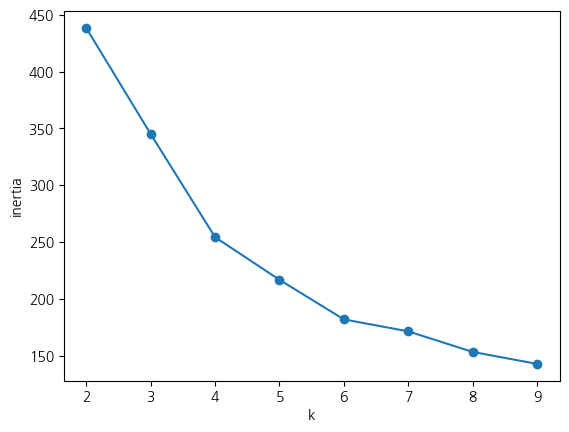

In [11]:
# -----------------
# 이너셔 시각화
# -----------------
plt.plot(range(min_cluster,max_cluster), inertia, marker='o')
plt.xticks(range(min_cluster,max_cluster))
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

#### 실루엣 점수로 최적의 클러스터 갯수 찾기
- 실루엣 점수란?
    - 한 데이터가 자신의 클러스터 안에서는 얼마나 가깝고 다른 클러스터와는 얼마나 떨어져있는가를 측정한 값
    - 1에 가까울수록 잘 분리된 클러스터
    - 0에 가까울수록 클러스터간 경계가 애매함
    - 음수 -> 잘못된 군집 배정 가능성

In [12]:
# -----------------
# 군집 갯수에 따른 실루엣 점수
# -----------------
from sklearn.metrics import silhouette_score
for k in range(min_cluster, max_cluster):
    model = KMeans(n_clusters=k, random_state=random_state)
    labels = model.fit_predict(X_preporcessed)
    score = silhouette_score(X_preporcessed, labels)
    print(f"k = {k}, 실루엣 점수 = {score:.3f}")

k = 2, 실루엣 점수 = 0.303
k = 3, 실루엣 점수 = 0.312
k = 4, 실루엣 점수 = 0.350
k = 5, 실루엣 점수 = 0.350
k = 6, 실루엣 점수 = 0.356
k = 7, 실루엣 점수 = 0.332
k = 8, 실루엣 점수 = 0.336
k = 9, 실루엣 점수 = 0.312


- 실루엣 점수만 놓고 보면 가장 높은 점수를 얻은 $K$를 최적 값으로 선택
- 가장 높은 실루엣 점수는 0.356이며, 이때의 클러스터 개수는 *$K=6$*

**엘보우 기법과의 통합 판단**

두 지표를 종합적으로 고려할 때, 다음 두 가지 중 하나를 선택할 수 있음
1. $K=6$ 선택 (실루엣 점수 우선): 실루엣 점수가 가장 높아 클러스터링의 품질이 가장 좋다고 평가되는 지점 (0.350 $\rightarrow$ 0.356으로 미세하게 증가)
2. $K=5$ 선택 (엘보우 및 간결성 우선): $K=5$의 실루엣 점수(0.350)는 $K=6$의 점수(0.356)와 거의 차이가 없으며 (차이 $0.006$),  
엘보우 기법이 지적한 비용 효율적인 클러스터링의 시작점

- 일반적으로 두 점수가 비슷할 경우 더 적은 수의 클러스터를 선택하여 모델의 해석 용이성(간결성)을 높이는 경향이 있음

## K = 5

#### 클러스터링 학습

In [13]:
k = 5
from sklearn.cluster import KMeans
km = KMeans(n_clusters=k, random_state=random_state, n_init=20)
km.fit(X_preporcessed)
df['군집'] = km.labels_
df.head()

,고객ID,성별,나이,연간소득,소비점수,군집
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


- $\text{n\_init}=20$: 초기 중심점(centroid)을 20번 다르게 설정하여 가장 좋은 결과를 선택

### 군집분석

#### 군집별 데이터 수

In [14]:
df['군집'].value_counts().sort_index()

군집
0    58
1    39
2    47
3    34
4    22
Name: count, dtype: int64

- 비교적 고르게 분포되었음

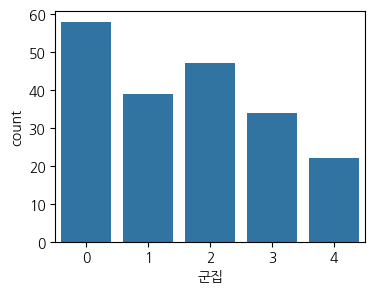

In [15]:
plt.figure(figsize=(4,3))
sns.countplot(x="군집", data=df);

#### 연속형 변수 시각화

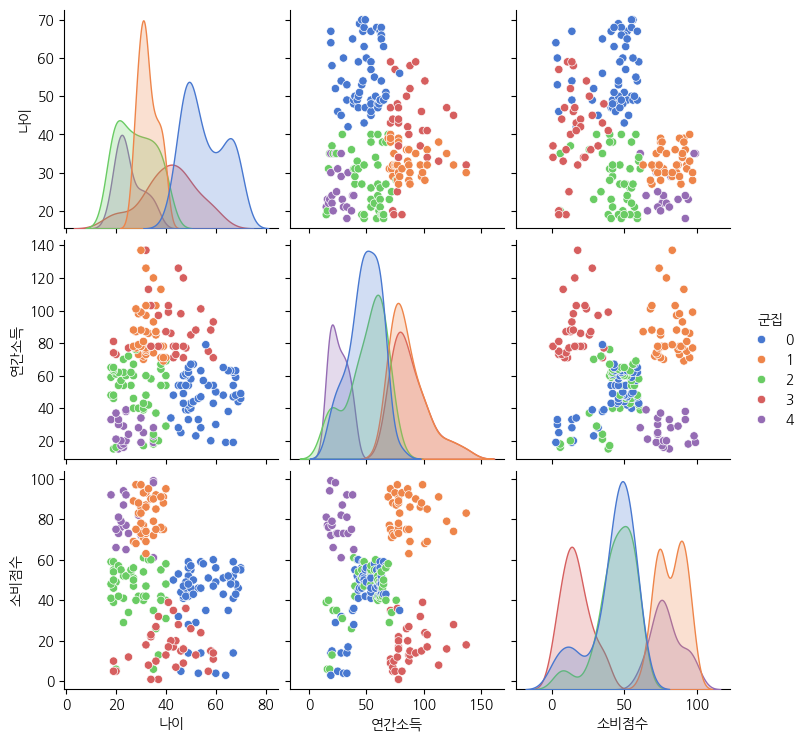

In [ ]:
# -------------------
# 연속형 변수 시각화
# -------------------
sns.pairplot(df[["나이", "연간소득", "소비점수", "군집"]], 
             hue='군집', palette='muted');

#### 범주형 변수 시각화

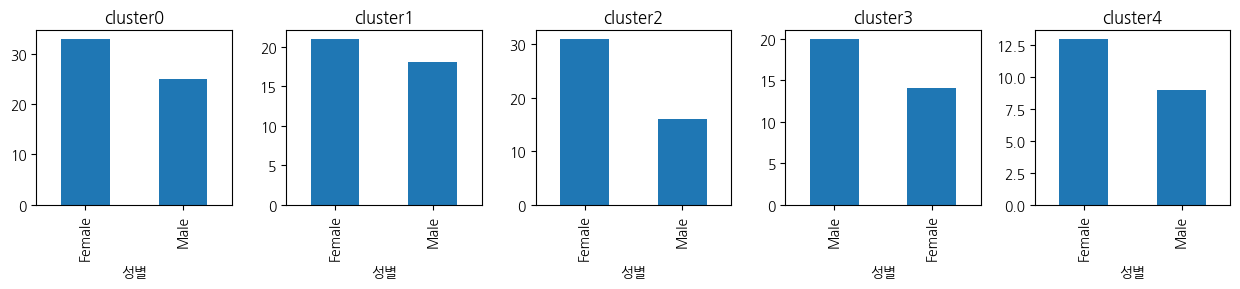

In [17]:
# -----------------------------
# 성별 빈도수 시각화
# -----------------------------
plt.figure(figsize=(15,3))
for i in range(k):
    plt.subplot(1,6,i+1)
    df.loc[df["군집"]==i, "성별"].value_counts().plot(kind="bar", title=f"cluster{i}")
    plt.tight_layout()

#### 특성-군집 분석

In [ ]:
# -----------------------------
# 클러스터별 남성의 비율
#   0:0.43
#   1:0.46
#   2:0.34(여성비율이 가장 높음)
#   3:0.59(남성비율이 가장 높음, 유일한 남자>여자)
#   4:0.41
# -----------------------------
df['성별_이진'] = df['성별'].map({'Male':1, 'Female':0})    # 성별 컬럼을 수치형 데이터로 변환
df[["성별_이진", "군집"]].groupby(by="군집").mean().round(2)    # 군집별로 성별_이진 평균 계산

,성별_이진
군집,
0,0.4300
1,0.4600
2,0.3400
3,0.5900
4,0.4100


- 여자의 성별은 0이니, 전체의 평균은 남자의 비율과 같음

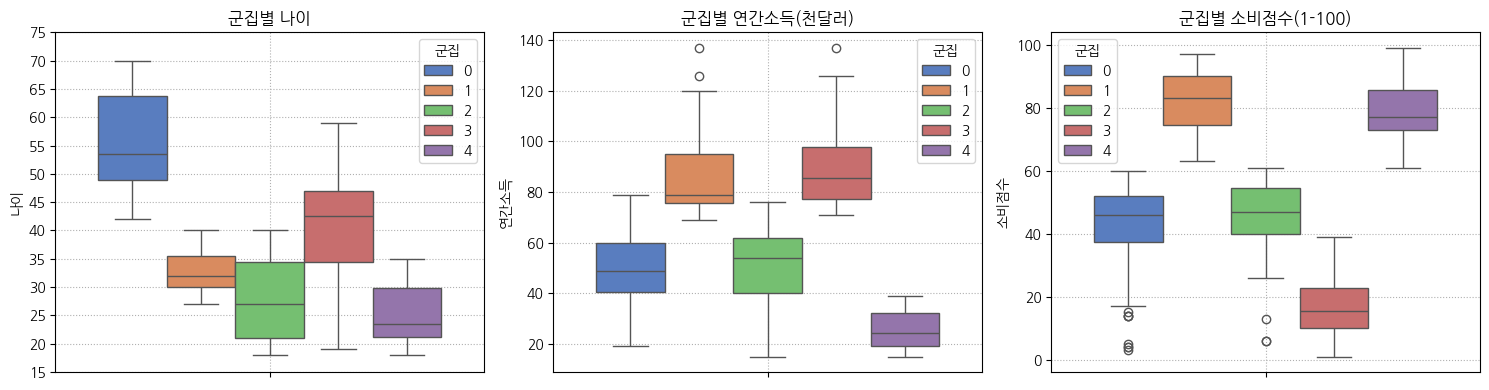

In [19]:
# -----------------------------
# "나이", "연간소득(천달러)", "소비점수(1-100)"
# -----------------------------
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(y="나이", data=df, hue="군집", palette="muted", ax=ax[0])
sns.boxplot(y="연간소득", data=df, hue="군집", palette="muted", ax=ax[1])
sns.boxplot(y="소비점수", data=df, hue="군집", palette="muted", ax=ax[2])

ax[0].set_title('군집별 나이')
ax[0].set_yticks(range(15,80,5))
ax[0].grid(ls=':')

ax[1].set_title('군집별 연간소득(천달러)')
ax[1].grid(ls=':')

ax[2].set_title('군집별 소비점수(1-100)')
ax[2].grid(ls=':')

plt.tight_layout()

- '연간소득'과 '소비점수' 축에서 군집들이 명확하게 분리되는 것을 관찰할 수 있음

In [ ]:
# -------------------
# 군집별 연령 범위
#   0: 42~70(높음, 중장년층)
#   1: 27~40(경제활동활발한나이)
#   2: 18~40(낮음, 청년층)
#   3: 19~59(넓게분포)
#   4: 18~35(낮음, 청년층)
# -------------------
df.groupby(by='군집')['나이'].agg(['min','max']) 

,min,max
군집,,
0,42,70
1,27,40
2,18,40
3,19,59
4,18,35


In [ ]:
# -------------------
# 군집별 연간소득 범위 
#   0: 19~79(넓게 분포)
#   1: 69~137(가장 높음)
#   2: 15~76(넓게 분포)
#   3: 71~137(가장 높음)
#   4: 15~39(낮음)
# -------------------
df.groupby(by='군집')['연간소득'].agg(['min','max']) 

,min,max
군집,,
0,19,79
1,69,137
2,15,76
3,71,137
4,15,39


In [ ]:
# -------------------
# 군집별 소비점수 범위 
#   0: 3~60(넓게 분포)
#   1: 63~97(가장 높음)
#   2: 6~61(넓게 분포)
#   3: 1~39(가장 낮음)
#   4: 61~99(가장 높음)
# -------------------
df.groupby(by='군집')['소비점수'].agg(['min','max']) 

,min,max
군집,,
0,3,60
1,63,97
2,6,61
3,1,39
4,61,99


#### 군집별 특징 정리

💡 K=5 군집별 특징 정리 및 고객 세분화

<br>

| 클러스터 | 남성 비율 | 연령 | 연간소득 (천달러) | 소비점수 | 고객 특징 (세그먼트) |
|---|---|---|---|---|---|
| 0 (58명) | 0.43 | 중장년층 <br> (42~70) | 중간~높음 <br> (19~79) | 중간 (35~60) | 평범한 중장년 고객: 안정적 소득, 중간 수준의 소비 |
| 1 (39명) | 0.46 | 경제 활동층 <br> (27~40) | 높음 <br> (69~137) | 높음 (63~97) | VIP 고소득-고소비 고객: 가장 높은 소득과 소비, **핵심 마케팅 대상** |
| 2 (47명) | 0.34 <br> (여성 다수) | 저연령층 <br> (18~40) | 중간~높음 <br> (15~76) | 중간 <br> (6~61) | 잠재적 고객 (저소비): 소득은 다양하나 소비 성향이 매우 낮음 |
| 3 (34명) | 0.59 <br> (남성 다수) | 다양함 <br> (19~59) | 높음 <br> (71~137) | 낮음 <br> (1~39) | 절약형 고소득 고객: 소득은 높으나 소비 성향이 매우 낮음, 남성 비중 높음 |
| 4 (22명) | 0.41 | 저연령층 <br> (18~35) | 낮음 <br> (15~39) | 높음 <br> (61~99) | 낭비형 저소득 고객: 소득은 낮으나 소비 성향이 매우 높음, <br> 충성도 낮은 고객일 가능성 있음 |

$\text{K}=5$ 클러스터링은 '연간소득'과 '소비점수' 축을 기준으로 고객을 효과적으로 분리하고 있음

1. VIP 고객 (군집 1): 높은 소득과 소비 성향을 보여주는 가장 이상적인 고객 그룹

2. 잠재/절약형 고소득 고객 (군집 3): 소득은 높으나 소비 성향이 낮아, 맞춤형 마케팅을 통해 소비를 유도할 수 있는 그룹(남성 비중 높음)

3. 낭비형 저소득 고객 (군집 4): 소득에 비해 소비가 높은 그룹으로, 이탈 방지 및 건전한 소비 유도 전략이 필요함

## K = 6

#### 클러스터링 학습

In [23]:
k = 6
from sklearn.cluster import KMeans
km = KMeans(n_clusters=k, random_state=random_state, n_init=20)
km.fit(X_preporcessed)
df['군집'] = km.labels_
df.head()

,고객ID,성별,나이,연간소득,소비점수,군집,성별_이진
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,2,0


### 군집분석

#### 군집별 데이터 수

In [24]:
df['군집'].value_counts().sort_index()

군집
0    45
1    39
2    21
3    34
4    23
5    38
Name: count, dtype: int64

- 총 200명의 고객이 6개의 군집에 비교적 균등하게 분배됨
- 특히 군집 2($21$명)와 군집 4($23$명)는 다른 군집에 비해 고객 수가 적은 편

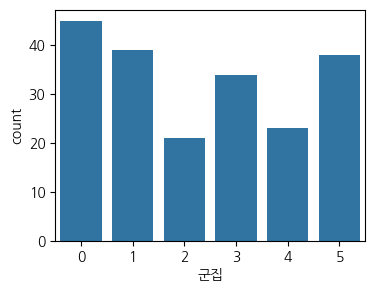

In [25]:
plt.figure(figsize=(4,3))
sns.countplot(x="군집", data=df);

#### 연속형 변수 시각화

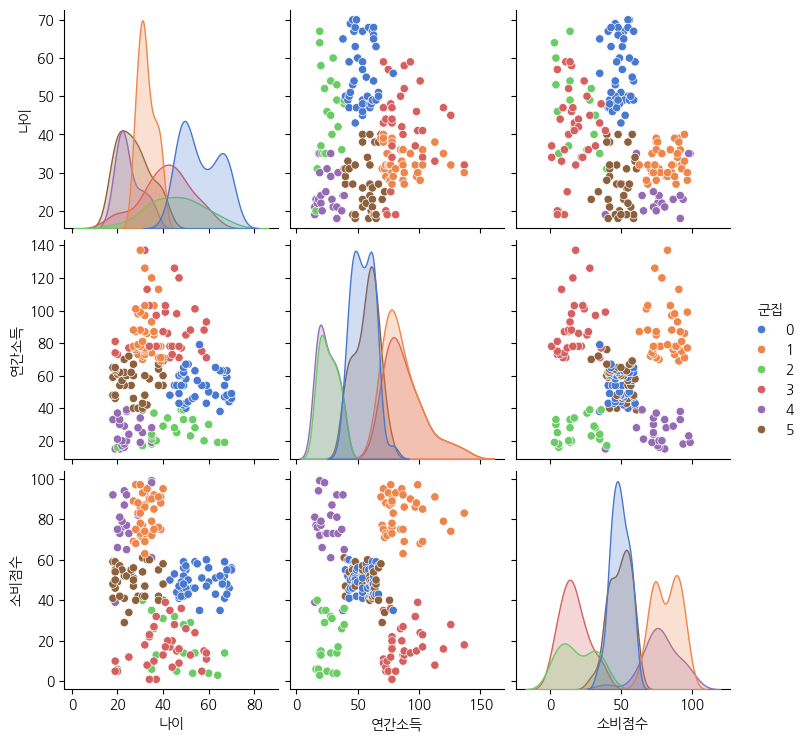

In [ ]:
# -------------------
# 연속형 변수 시각화
# -------------------
sns.pairplot(df[["나이", "연간소득", "소비점수", "군집"]], 
             hue='군집', palette='muted');

#### 범주형 변수 시각화

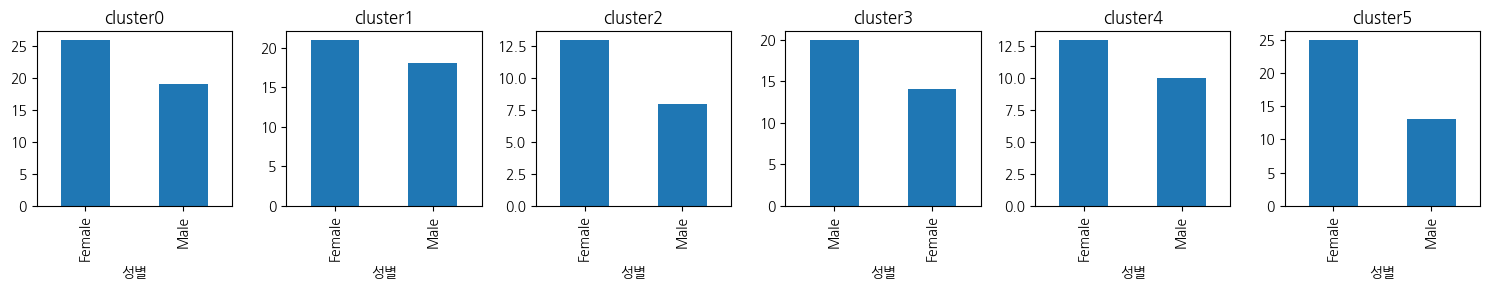

In [27]:
# -----------------------------
# 성별 빈도수 시각화
# -----------------------------
plt.figure(figsize=(15,3))
for i in range(k):
    plt.subplot(1,6,i+1)
    df.loc[df["군집"]==i, "성별"].value_counts().plot(kind="bar", title=f"cluster{i}")
    plt.tight_layout()

#### 특성-군집 분석

In [ ]:
# -----------------------------
# 클러스터별 남성의 비율
#   0:0.42
#   1:0.46
#   2:0.38
#   3:0.59(남성비율이 가장 높음)
#   4:0.43
#   5:0.34(여성비율이 가장 높음)
# -----------------------------
df['성별_이진'] = df['성별'].map({'Male':1, 'Female':0})
df[["성별_이진", "군집"]].groupby(by="군집").mean().round(2)


,성별_이진
군집,
0,0.4200
1,0.4600
2,0.3800
3,0.5900
4,0.4300
5,0.3400


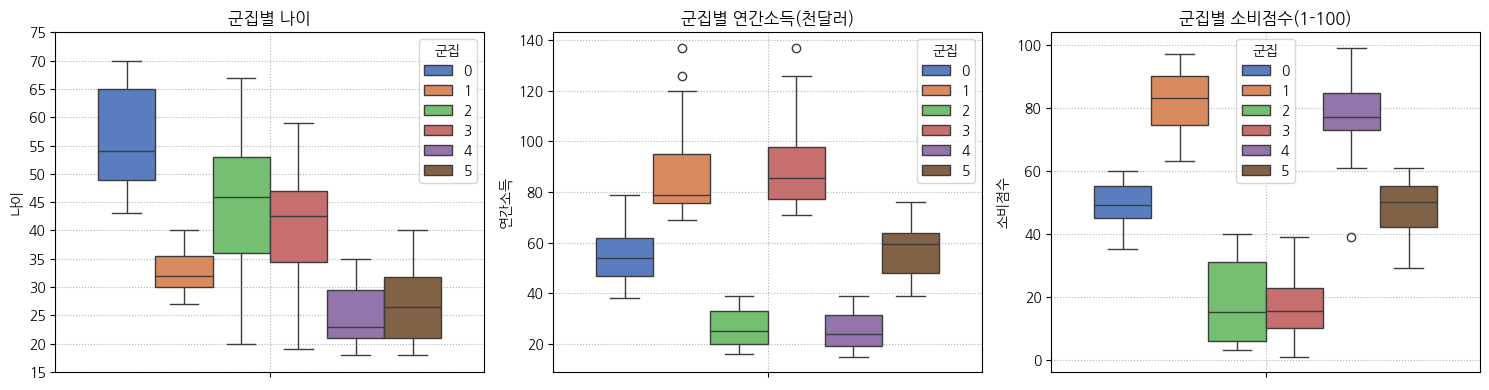

In [29]:
# -----------------------------
# "나이", "연간소득(천달러)", "소비점수(1-100)"
# -----------------------------
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(y="나이", data=df, hue="군집", palette="muted", ax=ax[0])
sns.boxplot(y="연간소득", data=df, hue="군집", palette="muted", ax=ax[1])
sns.boxplot(y="소비점수", data=df, hue="군집", palette="muted", ax=ax[2])

ax[0].set_title('군집별 나이')
ax[0].set_yticks(range(15,80,5))
ax[0].grid(ls=':')

ax[1].set_title('군집별 연간소득(천달러)')
ax[1].grid(ls=':')

ax[2].set_title('군집별 소비점수(1-100)')
ax[2].grid(ls=':')

plt.tight_layout()

In [ ]:
# -------------------
# 군집별 연령 범위
#   0: 43~70(높음, 중장년층)
#   1: 27~40(경제활동활발한나이)
#   2: 20~67(넓게분포)
#   3: 19~59(넓게분포)
#   4: 18~35(낮음, 청년층)
#   5: 18~40(낮음, 청년층)
# -------------------
df.groupby(by='군집')['나이'].agg(['min','max']) 


,min,max
군집,,
0,43,70
1,27,40
2,20,67
3,19,59
4,18,35
5,18,40


In [ ]:
# -------------------
# 군집별 연간소득 범위 
#   0: 38~79(중간)
#   1: 69~137(가장 높음)
#   2: 16~39(가장 낮음)
#   3: 71~137(높음)
#   4: 15~29(가장 낮음)
#   5: 39~76(중간)
# -------------------
df.groupby(by='군집')['연간소득'].agg(['min','max']) 


,min,max
군집,,
0,38,79
1,69,137
2,16,39
3,71,137
4,15,39
5,39,76


In [ ]:
# -------------------
# 군집별 소비점수 범위 
#   0: 35~60(중간)
#   1: 63~97(가장 높음)
#   2: 3~40(가장 낮음)
#   3: 1~39(가장 낮음)
#   4: 39~99(높음)
#   5: 29~61(중간)
# -------------------
df.groupby(by='군집')['소비점수'].agg(['min','max']) 


,min,max
군집,,
0,35,60
1,63,97
2,3,40
3,1,39
4,39,99
5,29,61


#### 군집별 특징 정리

💡 K=6 군집별 특징 정리 및 고객 세분화

$\text{K}=6$ 클러스터링 결과는 $\text{K}=5$보다 고객군을 좀 더 세분화하여 연령에 따른 차이를 명확히 보여줌

<br>

| 클러스터  | 남성 비율 | 연령 | 연간소득 (천달러) | 소비점수 | 주요 특징 (고객 세그먼트) |
|---|---|---|---|---|---|
| **0** |  0.42 | 높음 <br> (43~70) | 중간 <br> (38~79) | 중간 <br> (35~60) | 중장년 평균: 안정적 소득 및 소비, 마케팅 비용 효율을 고려해야 함 |
| **1** |  0.46 | 경제 활동층 <br> (27~40) | 높음 <br> (69~137) | 높음 <br> (63~97) | VIP 고소득-고소비: **핵심 타겟**, 높은 충성도를 유지하는 마케팅 필요 |
| **2** |  0.38 | 넓게 분포 <br> (20~67) | 낮음 <br> (16~39) | 낮음 <br> (3~40) | 저소득/저소비: 소득도 소비도 가장 낮은 그룹, <br>  잠재 고객 또는 이탈 위험군. |
| **3** |  0.59 <br> (남성 다수) | 넓게 분포 <br> (19~59) | 높음 <br> (71~137) | 낮음 <br> (1~39) | 절약형 고소득 남성: 소득은 높으나 소비 성향이 매우 낮음, <br> 절약하는 경향이 강함 |
| **4** |  0.43 | 낮음 <br> (18~35) | 낮음 <br> (15~39) | 높음 <br> (39~99) | 낭비형 저소득: 소득 대비 소비가 가장 높음, <br>  젊은 충동 구매 성향이 강함 |
| **5** |  0.34 <br> (여성 다수) | 낮음 <br> (18~40) | 중간 <br> (39~76) | 중간 <br> (29~61) | 저연령 평균: $\text{K}=5$에서 분리된 그룹, <br> $\text{K}=0$과 유사하나 연령이 낮음 |

$\text{K}=6$ 클러스터링은 $\text{K}=5$와 비교하여 중간 소득/중간 소비 그룹을 연령에 따라 더 명확하게 분리함

(저소득/저소비 그룹을 독립적인 군집으로 분리해냄)

<br>

**1. 핵심 세그먼트 (K=5에서 유지된 강력한 그룹)**

- 군집 1 (VIP 고소득-고소비 고객): 연간 소득과 소비 점수 모두 가장 높은 그룹으로, 마케팅의 **최우선 타겟**

- 군집 3 (절약형 고소득 남성): 소득이 높지만 소비 점수가 가장 낮은 그룹, 남성 비율이 가장 높게 나타남  
 이들의 소비를 유도할 수 있는 맞춤 전략이 중요함

- 군집 4 (낭비형 저소득 고객): 소득은 낮지만 소비 점수가 높아, 충동 구매 성향이 높거나 잠재적으로 부채 위험이 있는 그룹으로,  
 맞춤형 상품 추천이 효과적일 수 있음

<br>

**2. K=6에서 세분화된 그룹**

$\text{K}=6$의 주요 변화는 $\text{K}=5$의 '평범한 고객' 그룹이 **'연령'**과 **'소득'**에 따라 더 나뉘었다는 점

- 군집 0 (중장년 평균): $\text{K}=5$의 '평범한 중장년 고객' 그룹과 유사하며, 높은 연령대(43~70세)에 중간 소득/소비 수준을 보임

- 군집 5 (저연령 평균): 연령대가 낮고 중간 수준의 소득/소비를 보이며, 여성 비율이 가장 높게 나타나는 그룹

- 군집 2 (저소득/저소비): 소득과 소비 모두 가장 낮은 그룹, 이들을 위한 특별 프로모션이나 저가 상품 전략을 고려할 수 있음